# 라이브러리 호출

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

# 데이터 관찰

In [3]:
train.shape

(26457, 20)

In [4]:
test.shape

(10000, 19)

In [5]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [6]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

# 전처리

In [8]:
data = pd.concat([train, test], axis = 0)

In [9]:
data.isnull().sum()

index                0
gender               0
car                  0
reality              0
child_num            0
income_total         0
income_type          0
edu_type             0
family_type          0
house_type           0
DAYS_BIRTH           0
DAYS_EMPLOYED        0
FLAG_MOBIL           0
work_phone           0
phone                0
email                0
occyp_type       11323
family_size          0
begin_month          0
credit           10000
dtype: int64

In [8]:
# data = data.drop("occyp_type", axis = 1)

In [10]:
data.isnull().sum()

index                0
gender               0
car                  0
reality              0
child_num            0
income_total         0
income_type          0
edu_type             0
family_type          0
house_type           0
DAYS_BIRTH           0
DAYS_EMPLOYED        0
FLAG_MOBIL           0
work_phone           0
phone                0
email                0
occyp_type       11323
family_size          0
begin_month          0
credit           10000
dtype: int64

In [11]:
len(data['gender'].unique())

2

In [12]:
unique_len = data.apply(lambda x : len(x.unique()))

In [13]:
unique_len

index            36457
gender               2
car                  2
reality              2
child_num            9
income_total       265
income_type          5
edu_type             5
family_type          5
house_type           6
DAYS_BIRTH        7183
DAYS_EMPLOYED     3640
FLAG_MOBIL           1
work_phone           2
phone                2
email                2
occyp_type          19
family_size         10
begin_month         61
credit               4
dtype: int64

In [14]:
group_1 = unique_len[unique_len <= 2].index
group_1

Index(['gender', 'car', 'reality', 'FLAG_MOBIL', 'work_phone', 'phone',
       'email'],
      dtype='object')

In [15]:
group_2 = unique_len[(unique_len > 2)\
             & (unique_len <= 10)].index
group_2

Index(['child_num', 'income_type', 'edu_type', 'family_type', 'house_type',
       'family_size', 'credit'],
      dtype='object')

In [16]:
group_3 = unique_len[(unique_len > 10)].index
group_3

Index(['index', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'occyp_type',
       'begin_month'],
      dtype='object')

## group_1

In [17]:
data[group_1]

,gender,car,reality,FLAG_MOBIL,work_phone,phone,email
0,F,N,N,1,0,0,0
1,F,N,Y,1,0,0,1
2,M,Y,Y,1,0,1,0
3,F,N,Y,1,0,1,0
4,F,Y,Y,1,0,0,0
...,...,...,...,...,...,...,...
9995,F,Y,Y,1,1,1,0
9996,M,Y,Y,1,1,0,0
9997,F,N,Y,1,0,0,0
9998,F,Y,N,1,0,1,0


In [18]:
data['gender'].unique()

array(['F', 'M'], dtype=object)

In [19]:
data['gender']

0       F
1       F
2       M
3       F
4       F
       ..
9995    F
9996    M
9997    F
9998    F
9999    F
Name: gender, Length: 36457, dtype: object

In [20]:
data['gender'] = data['gender'].replace(['F','M'], [0,  1])

In [21]:
data['gender']

0       0
1       0
2       1
3       0
4       0
       ..
9995    0
9996    1
9997    0
9998    0
9999    0
Name: gender, Length: 36457, dtype: int64

In [22]:
data[group_1]

,gender,car,reality,FLAG_MOBIL,work_phone,phone,email
0,0,N,N,1,0,0,0
1,0,N,Y,1,0,0,1
2,1,Y,Y,1,0,1,0
3,0,N,Y,1,0,1,0
4,0,Y,Y,1,0,0,0
...,...,...,...,...,...,...,...
9995,0,Y,Y,1,1,1,0
9996,1,Y,Y,1,1,0,0
9997,0,N,Y,1,0,0,0
9998,0,Y,N,1,0,1,0


In [23]:
data['car'].unique()

array(['N', 'Y'], dtype=object)

In [24]:
data['car'] = data['car'].replace(['N', 'Y'], [0, 1])

In [25]:
data['reality'].unique()

array(['N', 'Y'], dtype=object)

In [26]:
data['reality'] = data['reality'].replace(['N', 'Y'], [0, 1])

In [27]:
data[group_1]

,gender,car,reality,FLAG_MOBIL,work_phone,phone,email
0,0,0,0,1,0,0,0
1,0,0,1,1,0,0,1
2,1,1,1,1,0,1,0
3,0,0,1,1,0,1,0
4,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...
9995,0,1,1,1,1,1,0
9996,1,1,1,1,1,0,0
9997,0,0,1,1,0,0,0
9998,0,1,0,1,0,1,0


## group_2, 이상치 제거 및 카테고리형 변수 int화

In [28]:
data[group_2]

,child_num,income_type,edu_type,family_type,house_type,family_size,credit
0,0,Commercial associate,Higher education,Married,Municipal apartment,2.0,1.0
1,1,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,3.0,1.0
2,0,Working,Higher education,Married,House / apartment,2.0,2.0
3,0,Commercial associate,Secondary / secondary special,Married,House / apartment,2.0,0.0
4,0,State servant,Higher education,Married,House / apartment,2.0,2.0
...,...,...,...,...,...,...,...
9995,0,Working,Incomplete higher,Married,House / apartment,2.0,NaN
9996,0,Working,Secondary / secondary special,Civil marriage,House / apartment,2.0,NaN
9997,0,Working,Secondary / secondary special,Married,House / apartment,2.0,NaN
9998,0,Commercial associate,Secondary / secondary special,Married,House / apartment,2.0,NaN


<AxesSubplot:>

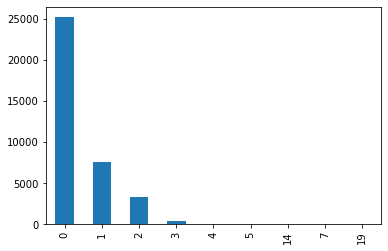

In [29]:
data["child_num"].value_counts().plot.bar()

In [30]:
data.loc[data['child_num'] > 2, 'child_num'] = 2

<AxesSubplot:>

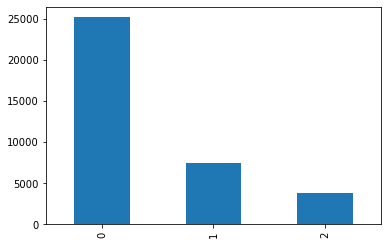

In [31]:
data["child_num"].value_counts().plot.bar()

In [32]:
data[group_2].apply(lambda x : len(x.unique()))

child_num       3
income_type     5
edu_type        5
family_type     5
house_type      6
family_size    10
credit          4
dtype: int64

In [33]:
from sklearn import preprocessing

In [34]:
label_encoder = preprocessing.LabelEncoder()

In [35]:
data['income_type'].unique()

array(['Commercial associate', 'Working', 'State servant', 'Pensioner',
       'Student'], dtype=object)

In [36]:
set(label_encoder.fit_transform(data['income_type']))

{0, 1, 2, 3, 4}

In [37]:
data['income_type'] = label_encoder.fit_transform(data['income_type'])
data['edu_type'] = label_encoder.fit_transform(data['edu_type'])
data['family_type'] = label_encoder.fit_transform(data['family_type'])
data['house_type'] = label_encoder.fit_transform(data['house_type'])

In [38]:
data[group_2]

,child_num,income_type,edu_type,family_type,house_type,family_size,credit
0,0,0,1,1,2,2.0,1.0
1,1,0,4,0,1,3.0,1.0
2,0,4,1,1,1,2.0,2.0
3,0,0,4,1,1,2.0,0.0
4,0,2,1,1,1,2.0,2.0
...,...,...,...,...,...,...,...
9995,0,4,2,1,1,2.0,NaN
9996,0,4,4,0,1,2.0,NaN
9997,0,4,4,1,1,2.0,NaN
9998,0,0,4,1,1,2.0,NaN


## group_3 , 구간화

In [39]:
data[group_3]

,index,income_total,DAYS_BIRTH,DAYS_EMPLOYED,occyp_type,begin_month
0,0,202500.0,-13899,-4709,NaN,-6.0
1,1,247500.0,-11380,-1540,Laborers,-5.0
2,2,450000.0,-19087,-4434,Managers,-22.0
3,3,202500.0,-15088,-2092,Sales staff,-37.0
4,4,157500.0,-15037,-2105,Managers,-26.0
...,...,...,...,...,...,...
9995,36452,202500.0,-18593,-5434,Accountants,-19.0
9996,36453,202500.0,-10886,-1315,Laborers,-34.0
9997,36454,292500.0,-21016,-14018,Medicine staff,-55.0
9998,36455,180000.0,-16541,-1085,NaN,-33.0


In [40]:
data['income_total'].min()

27000.0

In [41]:
data['income_total'].max()

1575000.0

In [42]:
len(data['income_total'].unique())

265

In [43]:
counts, bin_dividers = np.histogram(data['income_total'], bins = 7)

In [44]:
data['income_total']

0       202500.0
1       247500.0
2       450000.0
3       202500.0
4       157500.0
          ...   
9995    202500.0
9996    202500.0
9997    292500.0
9998    180000.0
9999    270000.0
Name: income_total, Length: 36457, dtype: float64

In [45]:
data['income_total'] = pd.factorize(pd.cut(data['income_total'], bins = bin_dividers, include_lowest=True, labels = [i for i in range(7)])
)[0]

In [46]:
data['income_total']

0       0
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: income_total, Length: 36457, dtype: int64

In [47]:
data['DAYS_BIRTH']

0      -13899
1      -11380
2      -19087
3      -15088
4      -15037
        ...  
9995   -18593
9996   -10886
9997   -21016
9998   -16541
9999    -9154
Name: DAYS_BIRTH, Length: 36457, dtype: int64

In [48]:
def make_bin(array, n):
    array = - array
    _, bin_dividers = np.histogram(array, bins = n)
    cut_categories = pd.cut(array, bin_dividers, labels = [i for i in range(n)], include_lowest=True)
    bined_array = pd.factorize(cut_categories)[0]
    return bined_array

In [49]:
pd.Series(make_bin(data['DAYS_BIRTH'], 10)).value_counts()

0    5177
3    5015
1    4922
5    4248
4    4063
2    3934
8    3713
6    3252
9    1252
7     881
dtype: int64

In [50]:
data['DAYS_BIRTH'] = make_bin(data['DAYS_BIRTH'], 10)
data['DAYS_EMPLOYED'] = make_bin(data['DAYS_EMPLOYED'], 6)
data['begin_month'] = make_bin(data['begin_month'], 4)


In [51]:
data[group_3]

,index,income_total,DAYS_BIRTH,DAYS_EMPLOYED,occyp_type,begin_month
0,0,0,0,0,NaN,0
1,1,0,1,0,Laborers,0
2,2,1,2,0,Managers,1
3,3,0,3,0,Sales staff,2
4,4,0,3,0,Managers,1
...,...,...,...,...,...,...
9995,36452,0,2,0,Accountants,1
9996,36453,0,5,0,Laborers,2
9997,36454,1,8,0,Medicine staff,3
9998,36455,0,4,0,NaN,2


In [68]:
data['occyp_type'].unique()
data['occyp_type'] = data['occyp_type'].fillna('No')
data['occyp_type'] = data['occyp_type'].replace(['No', 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
# for i,occyp in enumerate(data['occyp_type'].unique()):
#     data['occyp_type'].replace([occyp], [i])
data['occyp_type']

0       0
1       1
2       2
3       3
4       2
       ..
9995    8
9996    1
9997    7
9998    0
9999    1
Name: occyp_type, Length: 36457, dtype: int64

# 모델링

In [69]:
train.shape

(26457, 20)

In [70]:
test.shape

(10000, 19)

In [71]:
test = data[-10000:]

In [72]:
train = data[:-10000]

In [73]:
train_x = train.drop("credit", axis = 1)

In [74]:
train_y = train['credit']

In [75]:
test_x = test.drop("credit", axis = 1)

In [76]:
train_x.shape

(26457, 19)

In [77]:
train_y.shape

(26457,)

In [78]:
test_x.shape

(10000, 19)

## (1) RandomForest

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
clf = RandomForestClassifier()

In [81]:
clf.fit(train_x, train_y)

RandomForestClassifier()

In [82]:
train_proba = clf.predict_proba(train_x)

In [83]:
train_proba[:10]

array([[0.08, 0.78, 0.14],
       [0.11, 0.75, 0.14],
       [0.12, 0.04, 0.84],
       [0.74, 0.07, 0.19],
       [0.09, 0.02, 0.89],
       [0.03, 0.77, 0.2 ],
       [0.05, 0.06, 0.89],
       [0.75, 0.08, 0.17],
       [0.1 , 0.01, 0.89],
       [0.08, 0.17, 0.75]])

In [84]:
np.argmax(train_proba, axis = 1)[:10]

array([1, 1, 2, 0, 2, 1, 2, 0, 2, 2], dtype=int64)

In [85]:
sample_submission.iloc[:,1:] =  clf.predict_proba(test_x)

In [86]:
sample_submission

,index,0,1,2
0,26457,0.12,0.25,0.63
1,26458,0.22,0.22,0.56
2,26459,0.08,0.19,0.73
3,26460,0.15,0.18,0.67
4,26461,0.12,0.49,0.39
...,...,...,...,...
9995,36452,0.12,0.42,0.46
9996,36453,0.23,0.24,0.53
9997,36454,0.04,0.11,0.85
9998,36455,0.14,0.39,0.47


In [108]:
sample_submission.to_csv("0503_ver1.csv", index = False)

## (2-1) Validation

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y,
                 stratify = train_y, 
                 test_size = 0.25,
                 random_state = 10086
                 )

In [90]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(19842, 19) (6615, 19) (19842,) (6615,)


In [91]:
clf = RandomForestClassifier()

In [92]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [93]:
y_proba = clf.predict_proba(X_val)

In [94]:
y_val_onehot = pd.get_dummies(y_val)

In [95]:
y_proba

array([[0.22, 0.34, 0.44],
       [0.05, 0.18, 0.77],
       [0.12, 0.  , 0.88],
       ...,
       [0.06, 0.07, 0.87],
       [0.02, 0.21, 0.77],
       [0.12, 0.25, 0.63]])

In [96]:
y_val_onehot

,0.0,1.0,2.0
36,0,0,1
3464,0,0,1
2640,0,0,1
22500,0,1,0
17275,0,1,0
...,...,...,...
6806,0,1,0
23096,0,0,1
7756,0,0,1
23331,0,0,1


In [97]:
from sklearn.metrics import log_loss

In [98]:
log_loss(y_val_onehot, y_proba)

0.9981021140299718

## (2-2) K-Fold

In [99]:
from sklearn.model_selection import StratifiedKFold

In [100]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=55)


In [101]:
outcomes = []
for n_fold, (train_index, val_index)  in enumerate(folds.split(train_x, train_y)):
    X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
    y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    predictions = clf.predict_proba(X_val)
    y_val_onehot = pd.get_dummies(y_val)

    logloss = log_loss(y_val_onehot, predictions)
    outcomes.append(logloss)
    
np.mean(outcomes)

0.9839280319809296

In [102]:
np.mean(outcomes)

0.9839280319809296

In [103]:
outcomes = []
sub = np.zeros((test_x.shape[0],3))
for n_fold, (train_index, val_index)  in enumerate(folds.split(train_x, train_y)):
    X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
    y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    predictions = clf.predict_proba(X_val)
    y_val_onehot = pd.get_dummies(y_val)

    sub += clf.predict_proba(test_x)

    logloss = log_loss(y_val_onehot, predictions)
    outcomes.append(logloss)

sub = sub / 5
   
np.mean(outcomes)

0.97647433582773

In [104]:
sub

array([[0.118, 0.212, 0.67 ],
       [0.152, 0.212, 0.636],
       [0.076, 0.226, 0.698],
       ...,
       [0.068, 0.146, 0.786],
       [0.082, 0.42 , 0.498],
       [0.116, 0.414, 0.47 ]])

In [105]:
sample_submission.iloc[:,1:] =  sub

In [106]:
sample_submission

,index,0,1,2
0,26457,0.118,0.212,0.670
1,26458,0.152,0.212,0.636
2,26459,0.076,0.226,0.698
3,26460,0.108,0.218,0.674
4,26461,0.100,0.408,0.492
...,...,...,...,...
9995,36452,0.108,0.384,0.508
9996,36453,0.170,0.274,0.556
9997,36454,0.068,0.146,0.786
9998,36455,0.082,0.420,0.498


In [107]:
sample_submission.to_csv("5fold_prediction_ver1.csv", index = False)